## Assignment

In this assignment, you'll continue working with the Students Performance in Exams dataset from Kaggle. You should access the data from the Thinkful database. 

1) Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

2) Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

3) Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import seaborn as sns
from sqlalchemy import create_engine
import warnings
import sklearn
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


In [2]:
#Import dataset from postgres sql server

#defines the logon credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

#opens the connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host,
    postgres_port, postgres_db))

#queries the schema
student_df = pd.read_sql_query('select * from studentsperformance', con=engine)

#closes the connection
engine.dispose()

In [3]:
# student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### 1) Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

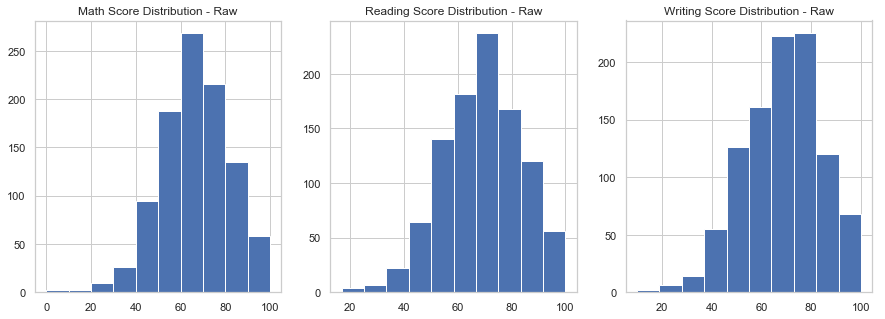

In [4]:
#Plot the exam scores on a histogram

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(student_df['math score'])
plt.title('Math Score Distribution - Raw')

plt.subplot(1,3,2)
plt.hist(student_df['reading score'])
plt.title('Reading Score Distribution - Raw')

plt.subplot(1,3,3)
plt.hist(student_df['writing score'])
plt.title('Writing Score Distribution - Raw')
plt.show()

In [11]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(student_df['math score'])
norm_stats = normaltest(student_df['math score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['reading score'])
norm_stats = normaltest(student_df['reading score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['writing score'])
norm_stats = normaltest(student_df['writing score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


The scores appear to be normally distributed but need to perform statistical test.

In [7]:
# Recieved error when doing BoxCox, can't have 0 as a value (not a positive)
# Write loop to eliminate any 'zeroes' from test scores

# student_df.loc[(student_df['math score']!=0)]
# student_df.describe()

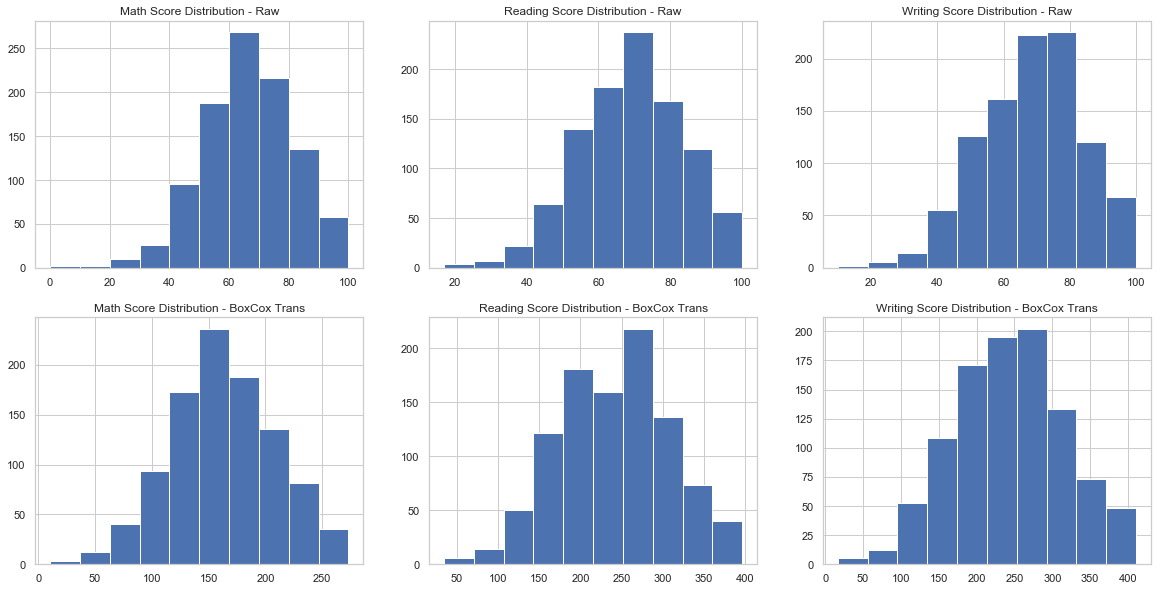

In [9]:
#Apply box-cox transformation to see if distribution changes

from scipy.stats import boxcox

math_score_bxcx,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
reading_score_bxcx,_ = boxcox(student_df['reading score'])
writing_score_bxcx,_ = boxcox(student_df['writing score'])

#Plot the transformed exam scores on a histogram

plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.hist(student_df['math score'])
plt.title('Math Score Distribution - Raw')

plt.subplot(2,3,2)
plt.hist(student_df['reading score'])
plt.title('Reading Score Distribution - Raw')

plt.subplot(2,3,3)
plt.hist(student_df['writing score'])
plt.title('Writing Score Distribution - Raw')

plt.subplot(2,3,4)
plt.hist(math_score_bxcx)
plt.title('Math Score Distribution - BoxCox Trans')

plt.subplot(2,3,5)
plt.hist(reading_score_bxcx)
plt.title('Reading Score Distribution - BoxCox Trans')

plt.subplot(2,3,6)
plt.hist(writing_score_bxcx)
plt.title('Writing Score Distribution - BoxCox Trans')

plt.show()


In [10]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(math_score_bxcx)
norm_stats = normaltest(math_score_bxcx)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_bxcx)
norm_stats = normaltest(reading_score_bxcx)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_bxcx)
norm_stats = normaltest(writing_score_bxcx)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


The distribution for reading and writing changed somewhat after applying the boxcox transformation however the p-values indicate that the data is still no normally distributed.  

### 2) Say we want to use a single variable for the exam scores as our target. 

- For this purpose, create a new variable by taking a weighted average of the exam scores. 
- Check whether this new variable is normally distributed. 
- If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [17]:
#Create a new variable averaging all 3 scores
student_df['Avg_scores']=(student_df[['math score', 'reading score', 'writing score']].sum(axis=1))/3
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


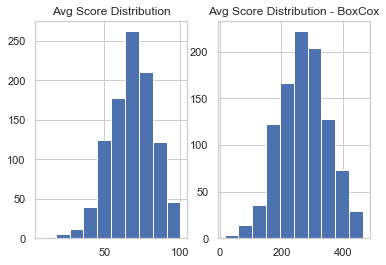

In [18]:
#Check distribution of new variable

avg_score_bxcx,_=boxcox(student_df['Avg_scores'])

plt.subplot(1,2,1)
plt.hist(student_df['Avg_scores'])
plt.title('Avg Score Distribution')

plt.subplot(1,2,2)
plt.hist(avg_score_bxcx)
plt.title('Avg Score Distribution - BoxCox')
plt.show()


plt.show()

In [19]:
jb_stats = jarque_bera(avg_score_bxcx)
norm_stats = normaltest(avg_score_bxcx)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


The average test score appear to not be normally distributed as the p-values are very high

### 3) Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [20]:
#Create correlation matrix

student_df.corr()

,math score,reading score,writing score,Avg_scores
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
Avg_scores,0.918746,0.970331,0.965667,1.000000


In [21]:
#Create dummy variables for non-numerical variables and then see the correlations

# append dummies to YouTube dataframe
for col in student_df.columns[:4]:
    student_df = pd.concat([student_df, pd.get_dummies(student_df.columns)], axis=1)
student_df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg_scores,Avg_scores,...,writing score,Avg_scores,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,82.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,92.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,76.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,female,group B,some college,standard,completed,88,95,92,91.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


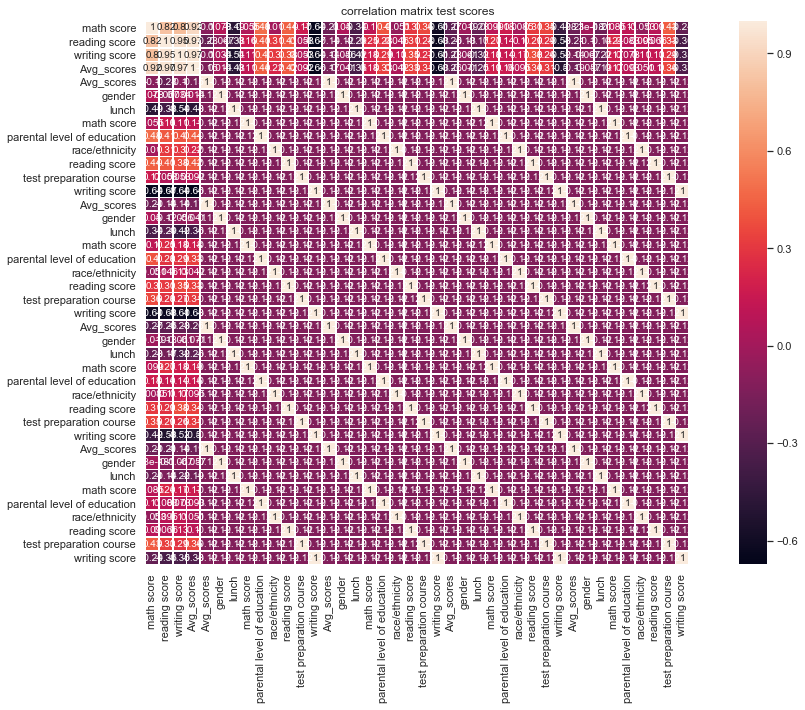

In [22]:
#Update correlation matrix and plot and plot heat map

corrmatrix_student = student_df.corr()

plt.figure(figsize=(18,10))

# draw the heatmap using seaborn.
sns.heatmap(corrmatrix_student, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix test scores")
plt.show()
